<a href="https://colab.research.google.com/github/carloslizarragac/FisicaComputacional1/blob/master/Actividad12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Solución de Ecuaciones Diferenciales Parciales de tipo Elíptico

Veremos en esta semana la solución de la [Ecuación de Poisson](https://en.wikipedia.org/wiki/Poisson%27s_equation)  

\begin{equation*}
- \nabla^2 u(x,y,z) = f(x,y,z) 
\end{equation*}

con distintas condiciones a la frontera:


*   Condiciones de Dirichlet (especificando valores de la función $u$)
*   Condiciones de Neumann (especificando valores de la derivada de la función $u$ perpendicular a la frontera $\partial u/\partial n$).

La Ecuación de Poisson aparece en problemas de campos gravitatorios, campos eléctricos y otros problemas en la Física. 

La Ecuación de Poisson es la generalización de la [Ecuación de Laplace](https://en.wikipedia.org/wiki/Laplace%27s_equation).

\begin{equation*}
\nabla^2 u = 0
\end{equation*}


**Solución Numérica de la Ecuación de Poisson por diferencias finitas en 2-D con condiciones a la frontera de tipo Dirichlet**.

Se busca la solución de la ecuación 

\begin{equation*}
- \nabla^2 u = f
\end{equation*}

dadas las condiciones en la frontera $\Gamma$

\begin{equation*}
u(x,y)_{\Gamma} = g(x,y)
\end{equation*}

No requerimos una condición inicial, pues no hay dependencia en el tiempo. Sólo requerimos conocer los valores a la frontera.

Supongamos que tenemos un dominio rectangular cartesiano $\Gamma = (a,b) \times (c,d)$, sobre el cual generamos una malla 

\begin{eqnarray*}
x_i & = & a + i h_x \quad i={0,1,2,\ldots, M} \\
y_k & = & c + k h_y \quad k={0,1,2,\ldots, N}
\end{eqnarray*}

donde los incrementos $h_x$ y $h_y$ estan definidos como 

\begin{eqnarray*}
h_x & = & \frac{(b-a)}{M} \\
h_y & = & \frac{(d-c)}{N}
\end{eqnarray*}

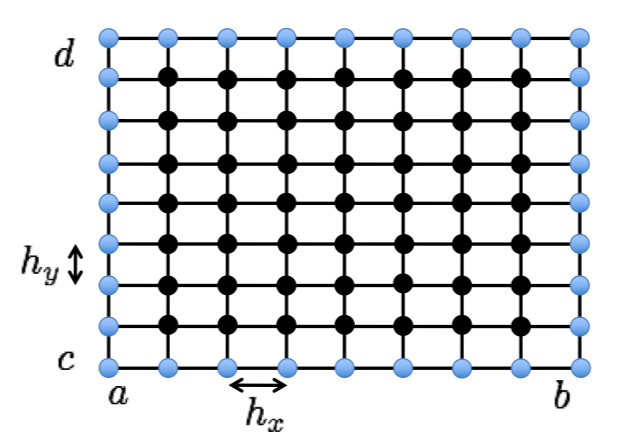


Si aproximamos las derivadas parciales de segundo orden de la ecuación de Poisson por diferencias finitas centradas de segundo orden

\begin{eqnarray*}
\frac{\partial^2 u(x_i, y_k)}{\partial x^2} & = & 
\frac{u(x_{i+1},y_k) - 2 u(x_i,y_k) + u(x_{i-1},y_k)}{h_x^2} + \cal{O}(h_x^3) \\
\frac{\partial^2 u(x_i, y_k)}{\partial y^2} & = & 
\frac{u(x_i,y_{k+1}) - 2 u(x_i,y_k) + u(x_i,y_{k-1}}{h_y^2} + \cal{O}(h_y^3) \\
\end{eqnarray*}

Si denotamos por $U_{i,k}$ el valor aproximado de $u(x_i, y_k)$, la ecuación de Poisson se puede aproximar por

\begin{eqnarray*}
- \frac{U_{i+1,k} - 2 U_{i,k} + U_{i-1,k}}{h_x^2}
- \frac{U_{i,k+1} - 2 U_{i,k} + U_{i,k-1}}{h_y^2}
& = & f_{i,k} + \cal{O}(h_x^3,h_y^3)
\end{eqnarray*}

Simplificando la expresión anterior y eliminando errores de orden superior, tendremos

\begin{eqnarray*}
 & - & \left( \frac{U_{i+1,k}+ U_{i-1,k}}{h_x^2}
+ \frac{U_{i,k+1} + U_{i,k-1}}{h_y^2} \right)  \\ 
& + & 2 \left( \frac{1}{h_x^2} + \frac{1}{h_y^2}\right) U_{i,k} = f_{i,k}
\end{eqnarray*}

donde los valores de $i={1,2,\ldots,M-1}$ y $k={1,2,\ldots,N-1}$ representan los puntos del interior del dominio. Los valores en la frontera ya han sido determinados en la definición del problema.

La ecuación anterior requiere un esténcil de 5 puntos como el que ya hemos utilizado con anterioridad


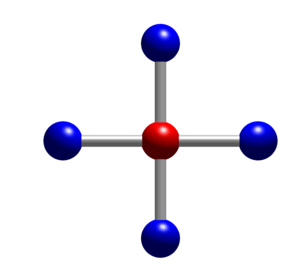


Supongamos por conveniencia que $h_x=h_y=h$, entonces el algoritmo para resolver la ecuación de Poisson se simplifica

\begin{equation*}
4 U_{i,k} - U_{i-1,k} - U_{i,k-1} - U_{i+1,k}
- U_{i,k+1} = h^2 f_{i,k}
\end{equation*}

Resolvamos el caso $M=N=5$.

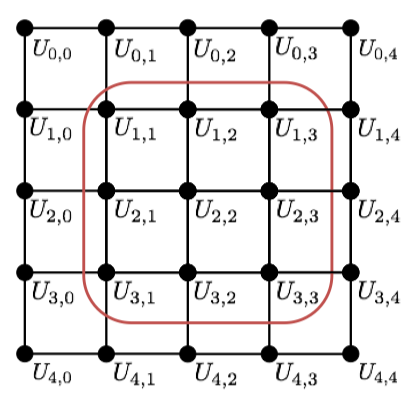


Y definamos las siguientes matrices de los puntos internos

\begin{equation*}
\mathbf{U_1} = \begin{bmatrix}
U_{1,1} \\ U_{2,1} \\ U_{3,1}
\end{bmatrix}; \quad
\mathbf{U_2} = \begin{bmatrix}
U_{1,2} \\ U_{2,2} \\ U_{3,2} 
\end{bmatrix}; \quad
\mathbf{U_3} = \begin{bmatrix}
U_{1,3} \\ U_{2,3} \\ U_{3,3}
\end{bmatrix}; \quad
\end{equation*}

las cuales las integramos en un vector $\mathbf{U}$

\begin{equation*}
\mathbf{U} = \begin{bmatrix}
\mathbf{U_{1}} \\ \mathbf{U_{2}} \\ \mathbf{U_{3}}
\end{bmatrix}
\end{equation*}

Los puntos de la frontera se encuentran definidos por las condiciones de Dirichlet


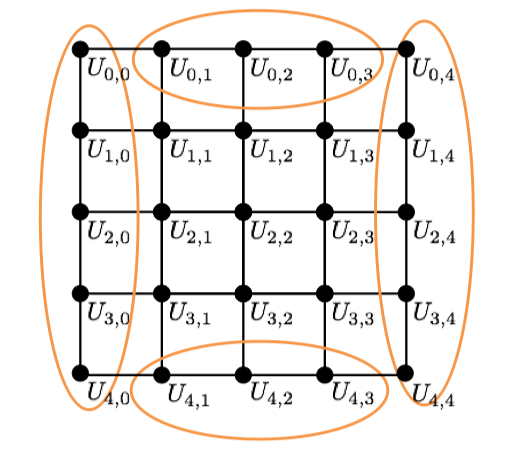


Trabajamos sobre el **primer grupo** de valores internos:

\begin{eqnarray*}
i=1,k=1 & : & 4 U_{1,1} - U_{1,2} - U_{2,1} = h^2 f_{1,1} + U_{1,0} + U_{0,1} \\
i=2,k=1 & : & 4 U_{2,1} - U_{1,1} - U_{3,1} - U_{2,2}= h^2 f_{2,1} + U_{2,0} \\
i=3,k=1 & : & 4 U_{3,1} - U_{2,1} - U_{3,2} = h^2 f_{3,1} + U_{3,0} + U_{4,1} \\
\end{eqnarray*}  

Matricialmente el sistema anterior se puede escribir como 

\begin{equation*}
\begin{bmatrix}
4 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 4 \\ 
\end{bmatrix} \ 
\begin{bmatrix}
U_{1,1} \\ U_{2,1} \\ U_{3,1}
\end{bmatrix} +
\begin{bmatrix}
-1 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & -1 \\
\end{bmatrix} \
\begin{bmatrix}
U_{1,2} \\ U_{2,2} \\ U_{3,2} \\
\end{bmatrix} = h^2
\begin{bmatrix}
f_{1,1} \\ f_{2,1} \\ f_{3,1}
\end{bmatrix} +
\begin{bmatrix}
U_{1,0} + U_{0,1} \\  U_{2,0} \\ U_{3,0} + U_{4,1} \\
\end{bmatrix}
\end{equation*}

De forma similar, trabajando en la **segunda columna interior** se obtiene una ecuación matricial

\begin{equation*}
\begin{bmatrix}
-1 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & -1 \\
\end{bmatrix} \
\begin{bmatrix}
U_{1,1} \\ U_{2,1} \\ U_{3,1} \\
\end{bmatrix} +
\begin{bmatrix}
4 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 4 \\ 
\end{bmatrix} \ 
\begin{bmatrix}
U_{1,2} \\ U_{2,2} \\ U_{3,2} 
\end{bmatrix}+
\begin{bmatrix}
-1 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & -1 \\
\end{bmatrix} \
\begin{bmatrix}
U_{1,3} \\ U_{2,3} \\ U_{3,3} \\
\end{bmatrix} = h^2
\begin{bmatrix}
f_{1,2} \\ f_{2,2} \\ f_{3,2}
\end{bmatrix} +
\begin{bmatrix}
U_{0,2} \\  0 \\ U_{4,2} \\
\end{bmatrix}
\end{equation*}

Y por último de la **tercera columna interior** se obtiene la ecuación matricial

\begin{equation*}
\begin{bmatrix}
-1 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & -1 \\
\end{bmatrix} \
\begin{bmatrix}
U_{1,2} \\ U_{2,2} \\ U_{3,2} \\
\end{bmatrix} +
\begin{bmatrix}
4 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 4 \\ 
\end{bmatrix} \ 
\begin{bmatrix}
U_{1,3} \\ U_{2,3} \\ U_{3,3} 
\end{bmatrix} = h^2
\begin{bmatrix}
f_{1,3} \\ f_{2,3} \\ f_{3,3}
\end{bmatrix} +
\begin{bmatrix}
U_{0,3} + U_{1,4}\\  U_{2,4} \\ U_{4,3} + U_{3,4} \\
\end{bmatrix}
\end{equation*}

En resumen, las expresiones anteriores se pueden expresar como 

\begin{equation*}
- \mathbf{U}_{i-1} + B\mathbf{U}_{i} - \mathbf{U}_{i-1} = h^2 \mathbf{f}_i + \mathbf{g}_i 
\end{equation*}

donde $B$ es la matriz tridiagonal $(M-2) \times (M-2)$

\begin{equation*}
B = \begin{bmatrix}
4 & -1 & 0 & 0 & \cdots & 0 \\
-1 & 4 & -1 & 0 & \cdots & 0 \\
0 & -1 & 4  & -1 & \cdots & 0 \\
 &     &    &     & \vdots &   \\
0 &  0  &  0 & 0 & 4 & -1 \\   
\end{bmatrix}
\end{equation*}

El vector $\mathbf{g}$ surge de los valores de la frontera superior e inferior

\begin{equation*}
\mathbf{g} = \begin{bmatrix}
g_{0,i} \\ 0 \\ \vdots \\ 0 \\ g_{M,i} \\
\end{bmatrix}
\end{equation*}

Cuando $i=1$ ó $i=M-1$, los valores de las fornteras verticales se aplican

\begin{equation*}
\mathbf{U}_0 = \mathbf{g}_0 = 
\begin{bmatrix}
g_{0,1} \\ g_{0,2} \\ \vdots \\ g_{0,M-1} \\
\end{bmatrix}; \quad
\mathbf{U}_M = \mathbf{g}_M = 
\begin{bmatrix}
g_{M,1} \\ g_{M,2} \\ \vdots \\ g_{M,M-1} \\
\end{bmatrix} 
\end{equation*}

Finalmente, la ecuación matricial de diferencias se puede compactar como 

\begin{equation*}
A \mathbf{U} = \mathbf{F}
\end{equation*}

donde la matriz $A$ es una matriz de estructura tridiaginal de $(M-2)^2 \times (M-2)^2$ de la forma

\begin{equation*}
A = \frac{1}{h^2} \begin{bmatrix}
B  & -I &   &  & \\
-I & B & -I &  & \\
    & \ddots & \ddots   & \ddots &  \\
    &   & -I & B & -I \\
    &  &    & -I & B \\   
\end{bmatrix}
\end{equation*}

y la matriz de valores desconocidos $\mathbf{U}$ y valores conocidos $\mathbf{F}$ son de dimensiones $R^{(M-2)^2}$.

La matriz $I$ es la matriz identidad $(M-2) \times (M-2)$ y el vector $\mathbf{F}$ de la derecha de dimensiones $(M-2)^2 \times 1$, está dado por

\begin{equation*}
\mathbf{F} = \begin{bmatrix}
f_1 + (g_0+g_1)/h^2 \\
f_2 + g_2/h^2 \\ \vdots \\
f_{M-2} + g_{M-2}/h^2 \\
f_{M-1} + (g_{M-1} + g_M)/h^2
\end{bmatrix}
\end{equation*}

Es importante a la hora de crear las matrices A y B sólo guardar los valores distintos de cero ([sparse matrix](https://en.wikipedia.org/wiki/Sparse_matrix) o matriz rala) 


**Ejemplo resuelto:**

Resuelva la ecuación de Poisson sobre un cuadrado unitario 

\begin{eqnarray*}
- \nabla^2 u(x,y) & = & 20 \cos(3\pi x) \sin(2\pi y) \\
 \mathrm{dadas \ las \ condiciones}& &  \\ 
u(0,y) & = & y^2 \\
u(1,y) & = & 1 \\
u(x,0) & = & x^3 \\
u(x,1) & = & 1
\end{eqnarray*}


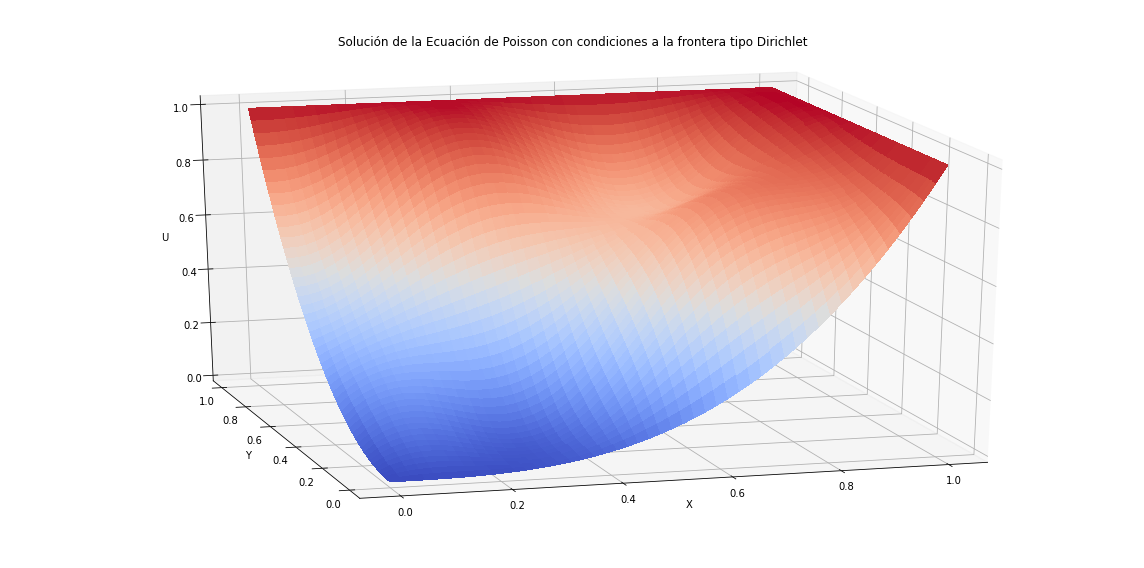

In [2]:


from scipy import sparse
from scipy.sparse.linalg import spsolve
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

# Ver función numpy.flaten(): https://www.geeksforgeeks.org/numpy-ndarray-flatten-function-python/
# Ver función numpy: ravel() : https://www.geeksforgeeks.org/numpy-ravel-python/
# Ver Producto Kronecker: https://en.wikipedia.org/wiki/Kronecker_product
# Ver función kron(): https://www.geeksforgeeks.org/python-numpy-np-kron-method/ 

def rhs_func(x, y, M):
    ###----- Element-wise multiplication -----###
    g = (20 * np.multiply(np.cos(3*np.pi*X[1:-1,1:-1]), np.sin(2*np.pi*Y[1:-1,1:-1]))).flatten()
    f = [g[i::M-2] for i in range(M-2)] # Extracts only the inner values
    f = np.asarray(f).flatten() # Flattens into a ((M-2)**2, ) array
    return f


def bc_dirichlet(x, y, m):
    ###----- Initializes boundary condition values -----###
    lBC = Y[:,0]**2
    leftBC = lBC[1:M-1]
    
    rBC = np.ones((M,1)).flatten()
    rightBC = rBC[1:M-1]
    
    tBC = X[0,:]**3
    topBC = tBC[1:M-1]
    
    bBC = np.ones((1,M)).flatten()
    bottomBC = bBC[1:M-1]
    
    ###----- Creates a ((M-2)**2, ) array of zeros -----###
    g1 = np.zeros(((M-2)**2, 1)).flatten()
    
    ###----- Fills in the top BC (red circles on p. 21) -----###
    for i in range(M-2):
        g1[(M-2)*i] = topBC[i] 
    
    ###----- Fills in the bottom BC (blue circles on p. 21) -----###
    for j in range(M-2):
        g1[(M-2)*(j+1)-1] = bottomBC[j]
    
    ###----- Fills in the left BC (top orange circle on p. 21) -----###
    k1 = np.zeros((len(leftBC),1))
    k1[0] = 1.0
    leftBCk = sparse.kron(k1,leftBC).toarray().flatten()
    
    ###----- Fills in the right BC (bottom orange circle on p. 21) -----###
    k2 = np.zeros((len(rightBC),1))
    k2[-1] = 1.0
    rightBCk = sparse.kron(k2,rightBC).toarray().flatten()
    
    ###----- Collects all -----###
    g = g1 + leftBCk + rightBCk
    
    return [g, lBC, tBC, rBC, bBC]
    

def generate_lhs_matrix(M, hx, hy):
    
    alpha = hx**2/hy**2

    main_diag = 2 * (1 + alpha) * np.ones((M - 2, 1)).ravel()
    off_diag = -1 * np.ones((M - 2, 1)).ravel()
    
    a = main_diag.shape[0]

    diagonals = [main_diag, off_diag, off_diag]

    B = sparse.diags(diagonals, [0, -1, 1], shape=(a, a)).toarray()
    
    C = sparse.diags([-1*np.ones((M+1, 1)).ravel()], [0], shape=(a,a)).toarray()
        
    e1 = sparse.eye(M-2).toarray()
    
    A1 = sparse.kron(e1,B).toarray()
    
    e2 = sparse.diags([1*np.ones((M, 1)).ravel(),1*np.ones((M, 1)).ravel()], [-1,1], shape=(M-2,M-2)).toarray()
    
    A2 = sparse.kron(e2,C).toarray()
    
    mat = A1 + A2

    return mat


###========================================###

M = 50
(x0, xf) = (0.0, 1.0)
(y0, yf) = (0.0, 1.0)

hx = (xf - x0)/(M-1)
hy = (yf - y0)/(M-1)

x1 = np.linspace(x0, xf, M)
y1 = np.linspace(y0, yf, M)

###----- Generates a grid ----###
X, Y = np.meshgrid(x1, y1)

###----- The right hand side function ----###
frhs = rhs_func(X, Y, M)

###----- Boundary conditions ----###
fbc = bc_dirichlet(X, Y, M)

rhs = frhs*(hx**2) + fbc[0]

A = generate_lhs_matrix(M, hx, hy)

###----- Solves A*x=b --> x=A\b ----###
V = np.linalg.solve(A,rhs)

###----- Reshapes the 1D array into a 2D array -----###
V = V.reshape((M-2, M-2)).T

###----- Fills in boundary values for Dirichlet BC -----###
U = np.zeros((M,M))

U[1:M-1, 1:M-1] = V
U[:,0] = fbc[1]
U[0,:] = fbc[2]
U[:,M-1] = fbc[3]
U[M-1,:] = fbc[4]

###----- Plots -----###
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, U, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

###----- Static image -----###
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U')
ax.set_title("Solución de la Ecuación de Poisson con condiciones a la frontera tipo Dirichlet")
plt.tight_layout()
ax.view_init(20, -106)
plt.show()

